<a href="https://colab.research.google.com/github/mickeykim70/ZTM_pytorch/blob/main/Code/02_NeuralNetworkClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신경망 분류

### 분류

|유형| 선택 | 예 |
|---|---|---|
|이진 분류|예/아니오|심장질환이 있습니까? 예/아니오|
|다중 클래스 분류|세 개 이상의 옵션|사진의 내용이 1)개 2) 고양이 3) 닭 중 선택|
|다중 레이블 분류|둘 이상의 옵션을 할당| 이 문서의 카테고리는 1)우주 2)수학 3)물리 에 해당|


### 1. 데이터 만들기 및 준비

Scikit-learn의 `make_circles()` 를 사용하여 서로 다른 색상의 색상의 점이 있는 두개의 원을 생성

In [1]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create dataset
X, y = make_circles(n_samples=n_samples, noise=0.03, random_state=42)

In [2]:
print(f'First 5 X features: \n{X[:5]}')
print(f'First 5 y labels: \n{y[:5]}')
print(f'X shape: {X.shape}, y shape: {y.shape}')

First 5 X features: 
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 y labels: 
[1 1 1 1 0]
X shape: (1000, 2), y shape: (1000,)


데이터 시각화

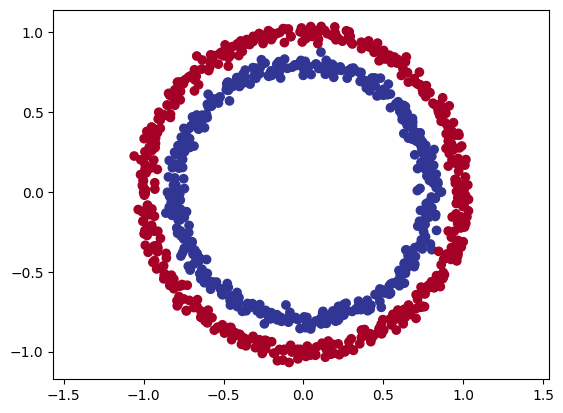

In [3]:
# Plotting the dataset(circles)
import matplotlib.pyplot as plt
plt.scatter(
    x=X[:,0],
    y=X[:,1],
    c=y,
    cmap=plt.cm.RdYlBu,
);
plt.axis("equal")
plt.show()

#### 1.1 데이터를 다룰때 가장 중요한 것은 입력과 출력의 `shape`를 항상 기억하고 일치시켜 주어야 함
입력: 2개(벡터) 출력: 1개(스칼라)

In [4]:
# Checking the shape of the dataset
print(f'X shape: {X.shape}, y shape: {y.shape}')

X shape: (1000, 2), y shape: (1000,)


#### 1.2 데이터를 텐서로 변환

In [5]:
# torch tensor conversion
import torch
import numpy as np
X = torch.tensor(X, dtype=torch.float)
y = torch.tensor(y, dtype=torch.long)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1, 1, 1, 1, 0]))

#### 1.3 학습데이터와 테스트데이터로 분리

In [7]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

# 모델 구축

In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'